In [1]:
import scipy.optimize
import numpy as np

import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("paper", font_scale=1)
sbn.set_style("whitegrid")

In [12]:
velocities = np.array([0, .5, 1, 1.3, 1.7, 2.2, 2.5, 3, 5, 10])
power = np.array([0, 0, 200, 400, 700, 1000, 1150, 1150, 1150, 1150])

/Users/Cain/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


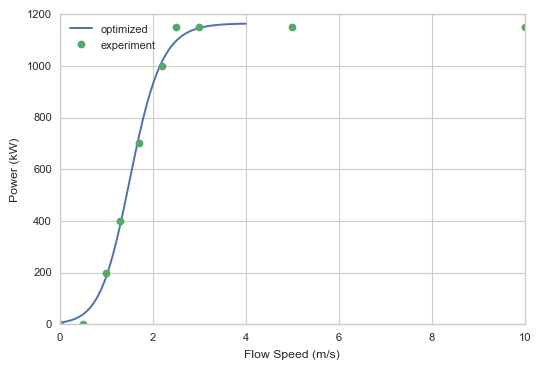

In [13]:
def richardsCurve(Velocity, K, Q, B,M,g):
    return K*(1+Q*np.exp(-1*B*(Velocity-M)))**(-1/g)

starting_guess = (1000, 10, 1, 1, 1)

optimized_parameters, covariance = scipy.optimize.curve_fit(richardsCurve, 
                                                                 xdata = velocities, 
                                                                 ydata = power, 
                                                                 p0 = starting_guess)
x = np.linspace(0,4)
y = richardsCurve(x, *optimized_parameters)
x1 = np.linspace(0,4)
y1 = richardsCurve(x, *starting_guess)
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(x,y,label='optimized')
plt.plot(velocities, power, 'o', label='experiment')
plt.ylabel('Power (kW)')
plt.xlabel('Flow Speed (m/s)')
plt.legend(loc='best')
plt.savefig('RichardsCurve.png', format='png', transparent=True, bbox_inches='tight')

In [17]:
print('[ {0:.3f} , {1:.3f} , {2:.3f} , {3:.3f} , {4:.3f}]'.format(*optimized_parameters))

[ 1164.785 , 2.834 , 2.778 , 1.020 , 0.751]
